In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [47]:
data = pd.read_csv('sonar.all-data',header=None,delimiter=',')

In [48]:
data.shape

(208, 61)

In [49]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R


In [50]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

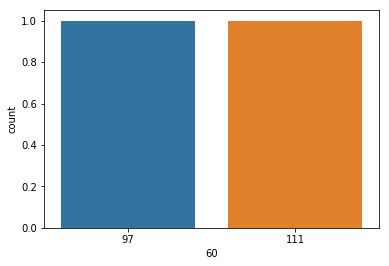

In [51]:
sns.countplot(data[60].value_counts())


In [62]:
def encoding(x):
    if x == 'R':
        return 0
    if x== 'M':
        return 1

In [64]:
data[60] = data[60].apply(encoding)

In [52]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
print(data.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

       ...       50         51         52       53         54         55         56       

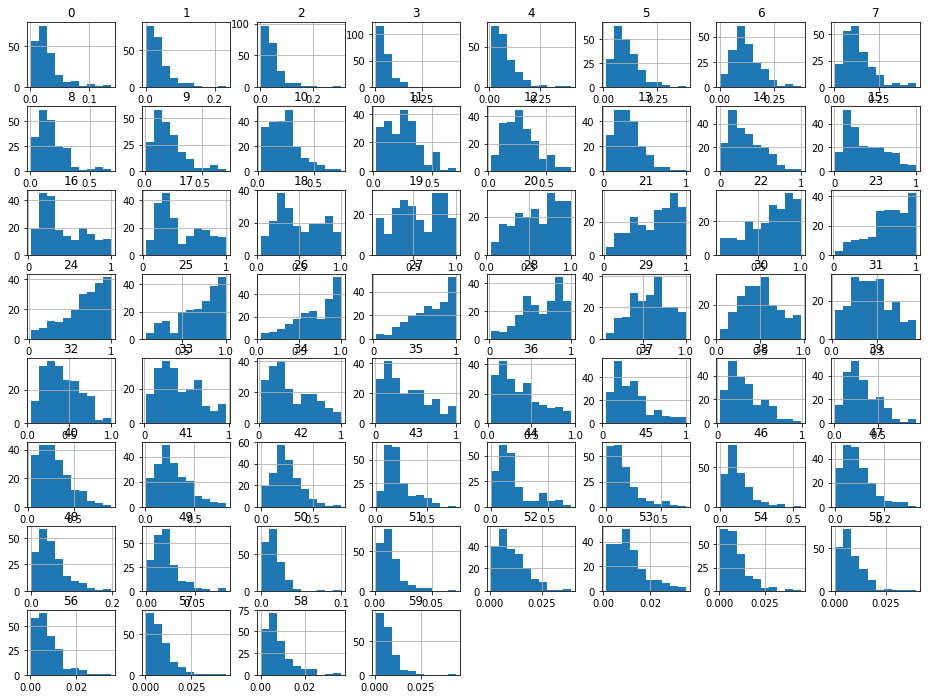

In [53]:
#Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

data.hist()
plt.show()

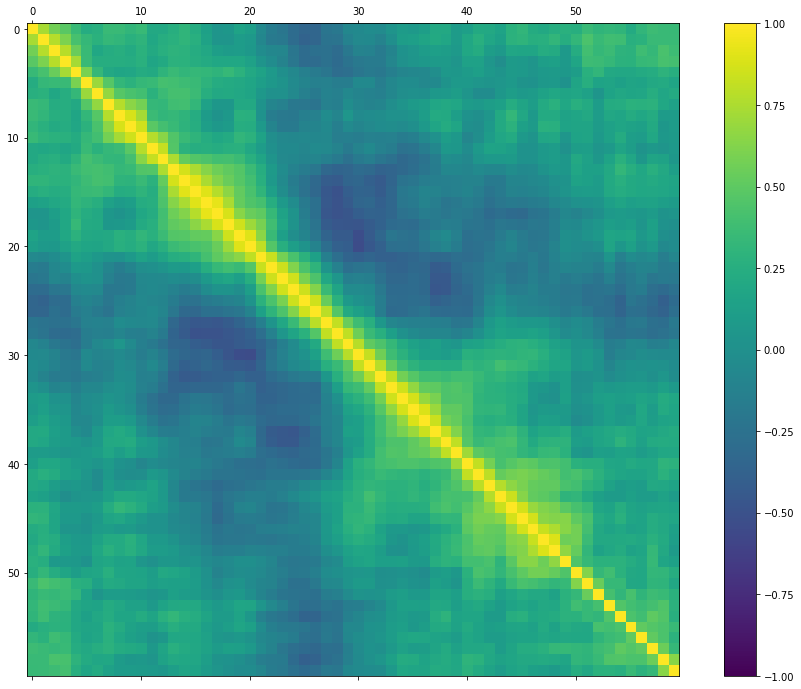

In [54]:

# Correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [65]:
# Dataset split

# Split-out validation dataset
array = data.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


# Logistic regression gives a better model with 80 % accuracy on text data

In [66]:
# Train a logistic regression classifer using the training set
clf = LogisticRegression()
clf.fit(X_train, Y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_validation)

# Compute the F1 score
metrics.f1_score(Y_validation, y_pred)

0.8076923076923077

In [71]:
# Train a Random forest classifer using the training set
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Evaluate the classifier on the test set
y_predrf = rf.predict(X_validation)

# Compute the F1 score
metrics.f1_score(Y_validation, y_predrf)


0.75

In [68]:
# Train a decision tree classifer using the training set
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Evaluate the classifier on the test set
y_preddt = dt.predict(X_validation)

# Compute the F1 score
metrics.f1_score(Y_validation, y_preddt)

0.7346938775510203

In [72]:
# Train a KNN classifer using the training set
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Evaluate the classifier on the test set
y_predknn = knn.predict(X_validation)

# Compute the F1 score
metrics.f1_score(Y_validation, y_predknn)

0.7843137254901961

In [73]:
# Train a SVC classifer using the training set
svc = SVC()
svc.fit(X_train, Y_train)

# Evaluate the classifier on the test set
y_predsvc = svc.predict(X_validation)

# Compute the F1 score
metrics.f1_score(Y_validation, y_predsvc)

0.7037037037037037

In [76]:
metrics.confusion_matrix(y_pred,Y_validation)

array([[11,  6],
       [ 4, 21]], dtype=int64)

In [77]:
metrics.confusion_matrix(y_preddt,Y_validation)

array([[11,  9],
       [ 4, 18]], dtype=int64)

In [78]:
metrics.confusion_matrix(y_predknn,Y_validation)

array([[11,  7],
       [ 4, 20]], dtype=int64)

In [79]:
metrics.confusion_matrix(y_predrf,Y_validation)

array([[12,  9],
       [ 3, 18]], dtype=int64)

In [80]:
metrics.confusion_matrix(y_predsvc,Y_validation)

array([[ 7,  8],
       [ 8, 19]], dtype=int64)